My First Project  #BN_RSI

In [2]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime as dt
from talib import RSI
import matplotlib.pyplot as plt
from datetime import timedelta


Read the .csv file with 3 min data for Bank nifty index 

In [3]:
# we will try to get last 10 year data for : BANKNIFTY INDEX

# start_date = dt.datetime(2011,1,1)
# end_date = dt.datetime(2020,5,1)


# will read the 3 min data of Bank Nifty from .csv file

data = pd.read_csv(r"C:\Users\Hardik\Desktop\PYTHON\algorithmic-trading-quantitative-analysis-using-python\BANK Nifty_3 min_10.02-05.06.20.csv")

In [4]:
data.tail()

,Date,BANK Nifty O,BANK Nifty H,BANK Nifty L,BANK Nifty C,BANK Nifty V
9642,2/10/2020 9:27,31073.40,31092.15,31072.80,31083.75,0
9643,2/10/2020 9:24,31100.30,31100.30,31075.75,31075.75,0
9644,2/10/2020 9:21,31126.25,31127.35,31064.60,31100.85,0
9645,2/10/2020 9:18,31130.10,31136.25,31097.75,31125.35,0
9646,2/10/2020 9:15,31248.65,31248.65,31101.20,31127.40,0


In [5]:
# now we will save this data to excel file to use it in future

# data.to_excel("BN_10_year_data.xlsx")

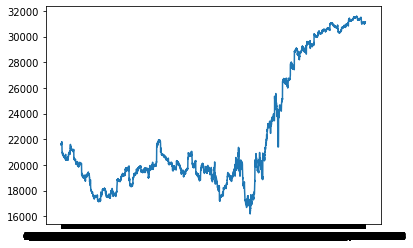

In [9]:
# now we will plot the bank nifty close price chart


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

close = data["BANK Nifty C"].values

fig = plt.figure()
x = data["Date"]
y = close
plt.plot(x,y)
plt.show()

In [12]:
data["RSI"] = RSI(close,timeperiod = 14)

In [16]:
data["signal"] = np.where(data["RSI"]>60,1,0)
data["signal"] = np.where(data["RSI"]<40,-1,data["signal"])

In [19]:
data = data.dropna()
data.head(20)

,Date,BANK Nifty O,BANK Nifty H,BANK Nifty L,BANK Nifty C,BANK Nifty V,RSI,signal
14,6/8/2020 10:09,21613.25,21655.25,21600.35,21631.50,0,49.954865,0
15,6/8/2020 10:06,21584.30,21615.65,21579.50,21614.80,0,46.908702,0
16,6/8/2020 10:03,21584.60,21599.35,21547.60,21585.20,0,42.018005,0
17,6/8/2020 10:00,21621.05,21621.05,21560.75,21585.50,0,42.083912,0
18,6/8/2020 9:57,21618.05,21657.55,21617.85,21625.30,0,50.175393,0
19,6/8/2020 9:54,21588.80,21625.55,21570.30,21614.25,0,48.163474,0
20,6/8/2020 9:51,21697.40,21699.30,21588.60,21588.60,0,43.775532,0
21,6/8/2020 9:48,21770.00,21772.20,21697.60,21697.60,0,60.319617,1
22,6/8/2020 9:45,21779.00,21786.65,21747.75,21775.10,0,67.616003,1
23,6/8/2020 9:42,21770.10,21790.70,21742.80,21778.35,0,67.882711,1


In [20]:
data["signal"].value_counts()

 0    4927
 1    2567
-1    2139
Name: signal, dtype: int64

In [21]:
# BN_Index_returns

df = pd.DataFrame()
df["BN_index_return"] = np.log(data["BANK Nifty C"]/data["BANK Nifty C"].shift(1))
df["BN_index_return"]

14           NaN
15     -0.000772
16     -0.001370
17      0.000014
18      0.001842
          ...   
9642    0.000431
9643   -0.000257
9644    0.000807
9645    0.000787
9646    0.000066
Name: BN_index_return, Length: 9633, dtype: float64

In [27]:
# df = pd.DataFrame()
# df["BN_index_return"] = data["BANK Nifty C"]/data["BANK Nifty C"].shift(1)
# df["BN_index_return"]

14           NaN
15      0.999228
16      0.998631
17      1.000014
18      1.001844
          ...   
9642    1.000431
9643    0.999743
9644    1.000808
9645    1.000788
9646    1.000066
Name: BN_index_return, Length: 9633, dtype: float64

In [35]:
# Startegy_return

df["Stretegy_return"] = data["signal"].shift(1) * df["BN_index_return"]
df["Stretegy_return"]

14           NaN
15      0.000000
16      0.000000
17      0.000000
18      0.000000
          ...   
9642    0.000000
9643    0.000000
9644    0.000000
9645    0.000000
9646    1.000066
Name: Stretegy_return, Length: 9633, dtype: float64

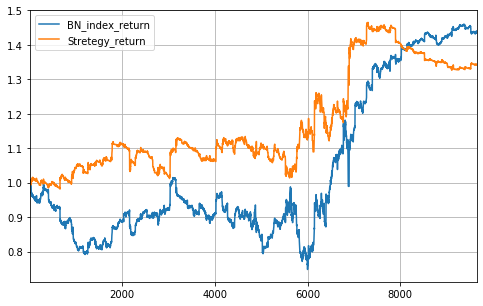

In [25]:
df[["BN_index_return","Stretegy_return"]].cumsum().apply(np.exp).plot(grid="True",figsize=(8,5))
plt.show()